In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os
import sys

# Get The Data

In [5]:
import os
import tarfile
import urllib
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    os.makedirs(housing_path, exist_ok=True)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
#fetch_housing_data()

In [6]:
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [7]:
housing = load_housing_data()
housing.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY

In [8]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**total bedrooms missing values**

In [9]:
housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [10]:
housing.describe() #describe numerical attr

longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.000000    787.000000    280.000000       2.563400   
50%        435.000000   1166.000000    409.000000       3.534800   
75%        647.000000   1725.000000    605.000000       4.743250   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        20640.000000  
mean        206855.816909  
std         115395.615874  
min          14999.000000  
25%         119600.000000  
50%         179700.000000  
75%         264725.000000  
max         500001.000000

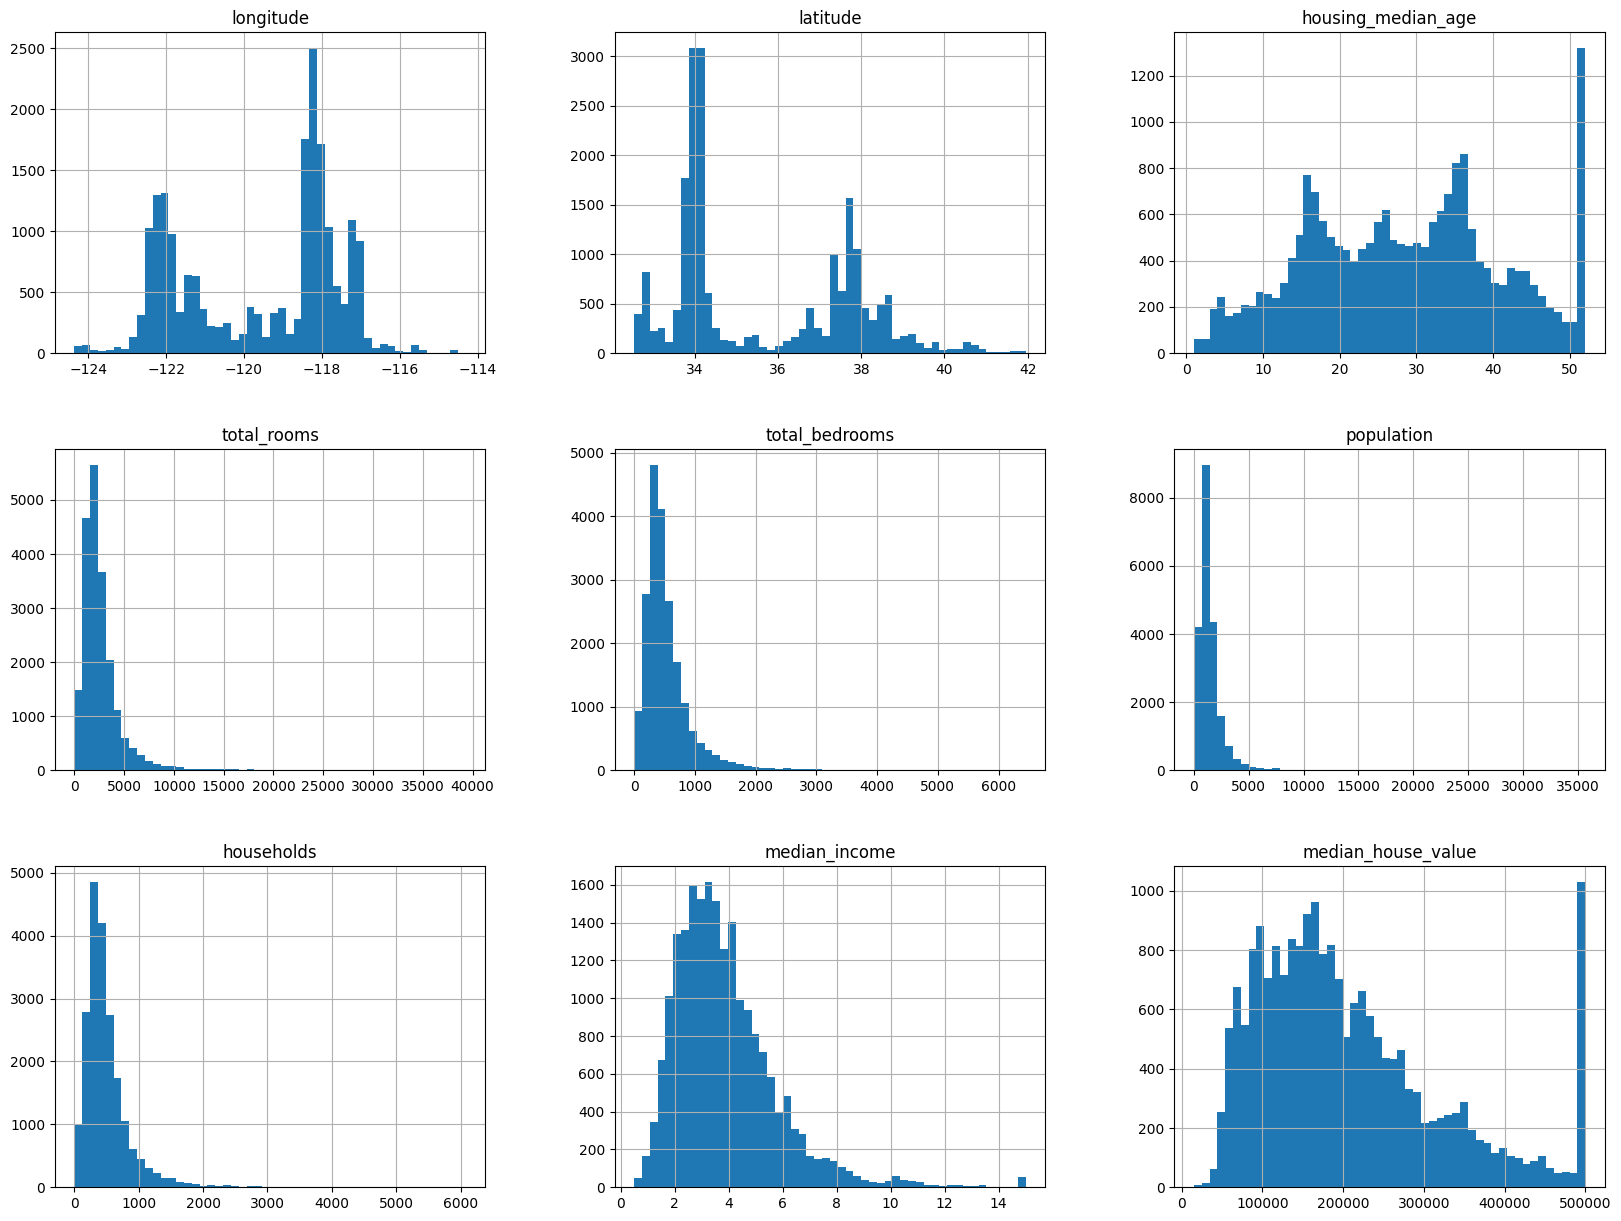

In [11]:
%matplotlib inline
housing.hist(bins=50, figsize=(20,15))
plt.show()

- **median income:**
  - capped (0.5 for low) (15.0001 for high)
  - scaled to represent roughly ten thounds (3 => 30,000) 
- **housing median age:** are capped at 50
- **median house value:** ___danger___ are capped at 500,000:
  - **solutions:**
     1. get proper labels for those capped data
     2. remove those samples from (_train_, _test_)
- **many histograms are _tail heavy_:** make it harder for ML models to detect patterns



## Create Test set

In [12]:
np.random.seed(42)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [13]:
train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set))
print(len(test_set))

16512
4128


In [14]:
train_set.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
14196    -117.03     32.71                33.0       3126.0           627.0   
8267     -118.16     33.77                49.0       3382.0           787.0   
17445    -120.48     34.66                 4.0       1897.0           331.0   
14265    -117.11     32.69                36.0       1421.0           367.0   
2271     -119.80     36.78                43.0       2382.0           431.0   

       population  households  median_income  median_house_value  \
14196      2300.0       623.0         3.2596            103000.0   
8267       1314.0       756.0         3.8125            382100.0   
17445       915.0       336.0         4.1563            172600.0   
14265      1418.0       355.0         1.9425             93400.0   
2271        874.0       380.0         3.5542             96500.0   

      ocean_proximity  
14196      NEAR OCEAN  
8267       NEAR OCEAN  
17445      NEAR OCEAN  
14265      NEAR OCEAN  
2271           INLAND

In [15]:
# from zlip import crc32

# def test_set_check(id, test_ratio):
#     return (crc32(np.int64(id)) & 0xffffffff) < test_ratio * (2**32)

# def split_train_test_by_id(data, test_ratio, id_column="id"):
#     ids = data[id_column]
#     in_test_set = ids.apply(lambda id: test_set_check(id, test_ratio))
#     return data.loc[~in_test_set], data.loc[in_test_set]

ModuleNotFoundError: No module named 'zlip'

In [ ]:
# housing_with_id = housing.reset_index() #add `index` col
# train_set, test_set = split_train_test_by_id(train_test_by_id, 0.2, "index")

In [16]:
# housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
# train_set, test_set = split_train_test_by_id(train_test_by_id, 0.2, "id")

NameError: name 'housing_with_id' is not defined

just use scikit

In [17]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

**above code => with pure random sampling** which is good in case of _large dataset_ (especially relative to the number of 
attributes \
BUT if not large you run the risk of **sampling bias** \
\
\
\
\
using **startified sampling** 
 > where population divided into homogeneous subgroups called _starta_ & right the amount of instances sampled from each _startum_

___assumption:___ 
> - that you chatted with experts => and conclude that _median income_ is very important attribute
> - you want to ensure test_set is ***repersentive***  to various categories of median income
> - since its numerical attr => you need to divide it into categories
>   - from hist: most values cluster between (1.5-6) (15.000, 60.000) but some go above 6
>   - **important:** to have suffiecient number of each instance in your dataset foro each _stratum_ => or else => maybe stratum's importance may be biased  )

<Axes: >

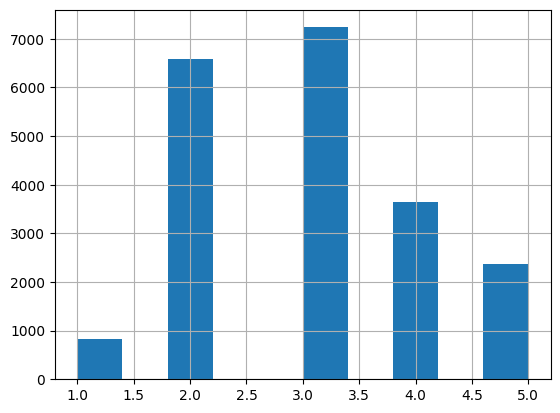

In [18]:
housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])
housing["income_cat"].hist()

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

In [20]:
?StratifiedShuffleSplit

Init signature:
StratifiedShuffleSplit(
    n_splits=10,
    *,
    test_size=None,
    train_size=None,
    random_state=None,
)
Docstring:     
Stratified ShuffleSplit cross-validator.

Provides train/test indices to split data in train/test sets.

This cross-validation object is a merge of StratifiedKFold and
ShuffleSplit, which returns stratified randomized folds. The folds
are made by preserving the percentage of samples for each class.

Note: like the ShuffleSplit strategy, stratified random splits
do not guarantee that all folds will be different, although this is
still very likely for sizeable datasets.

Read more in the :ref:`User Guide <stratified_shuffle_split>`.

For visualisation of cross-validation behaviour and
comparison between common scikit-learn split methods
refer to :ref:`sphx_glr_auto_examples_model_selection_plot_cv_indices.py`

Parameters
----------
n_splits : int, default=10
    Number of re-shuffling & splitting iterations.

test_size : float or int, default=N

In [21]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

<Axes: >

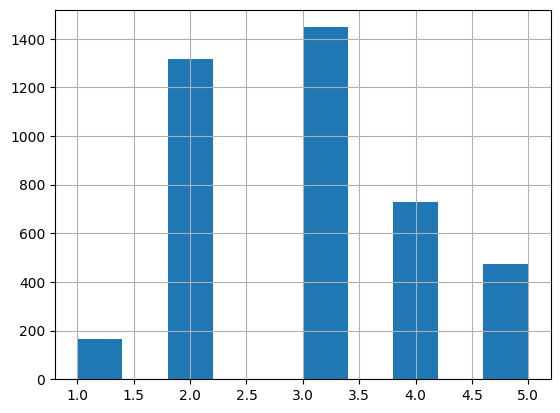

In [22]:
strat_test_set["income_cat"].hist()

In [23]:
test_set["income_cat"] = pd.cut(test_set["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], labels=[1,2,3,4,5])

In [24]:
print("pure random test set")
print(test_set["income_cat"].value_counts() / len(test_set))
print("starta test set")
print(strat_test_set["income_cat"].value_counts() / len(strat_test_set))

print("overall dataset")
print(housing["income_cat"].value_counts() / len(housing))

pure random test set
income_cat
3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: count, dtype: float64
starta test set
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
overall dataset
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


In [25]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

# Discover and Visualize the Data to Gain Insights

## Visualizing Geographical Data


In [26]:
housing = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

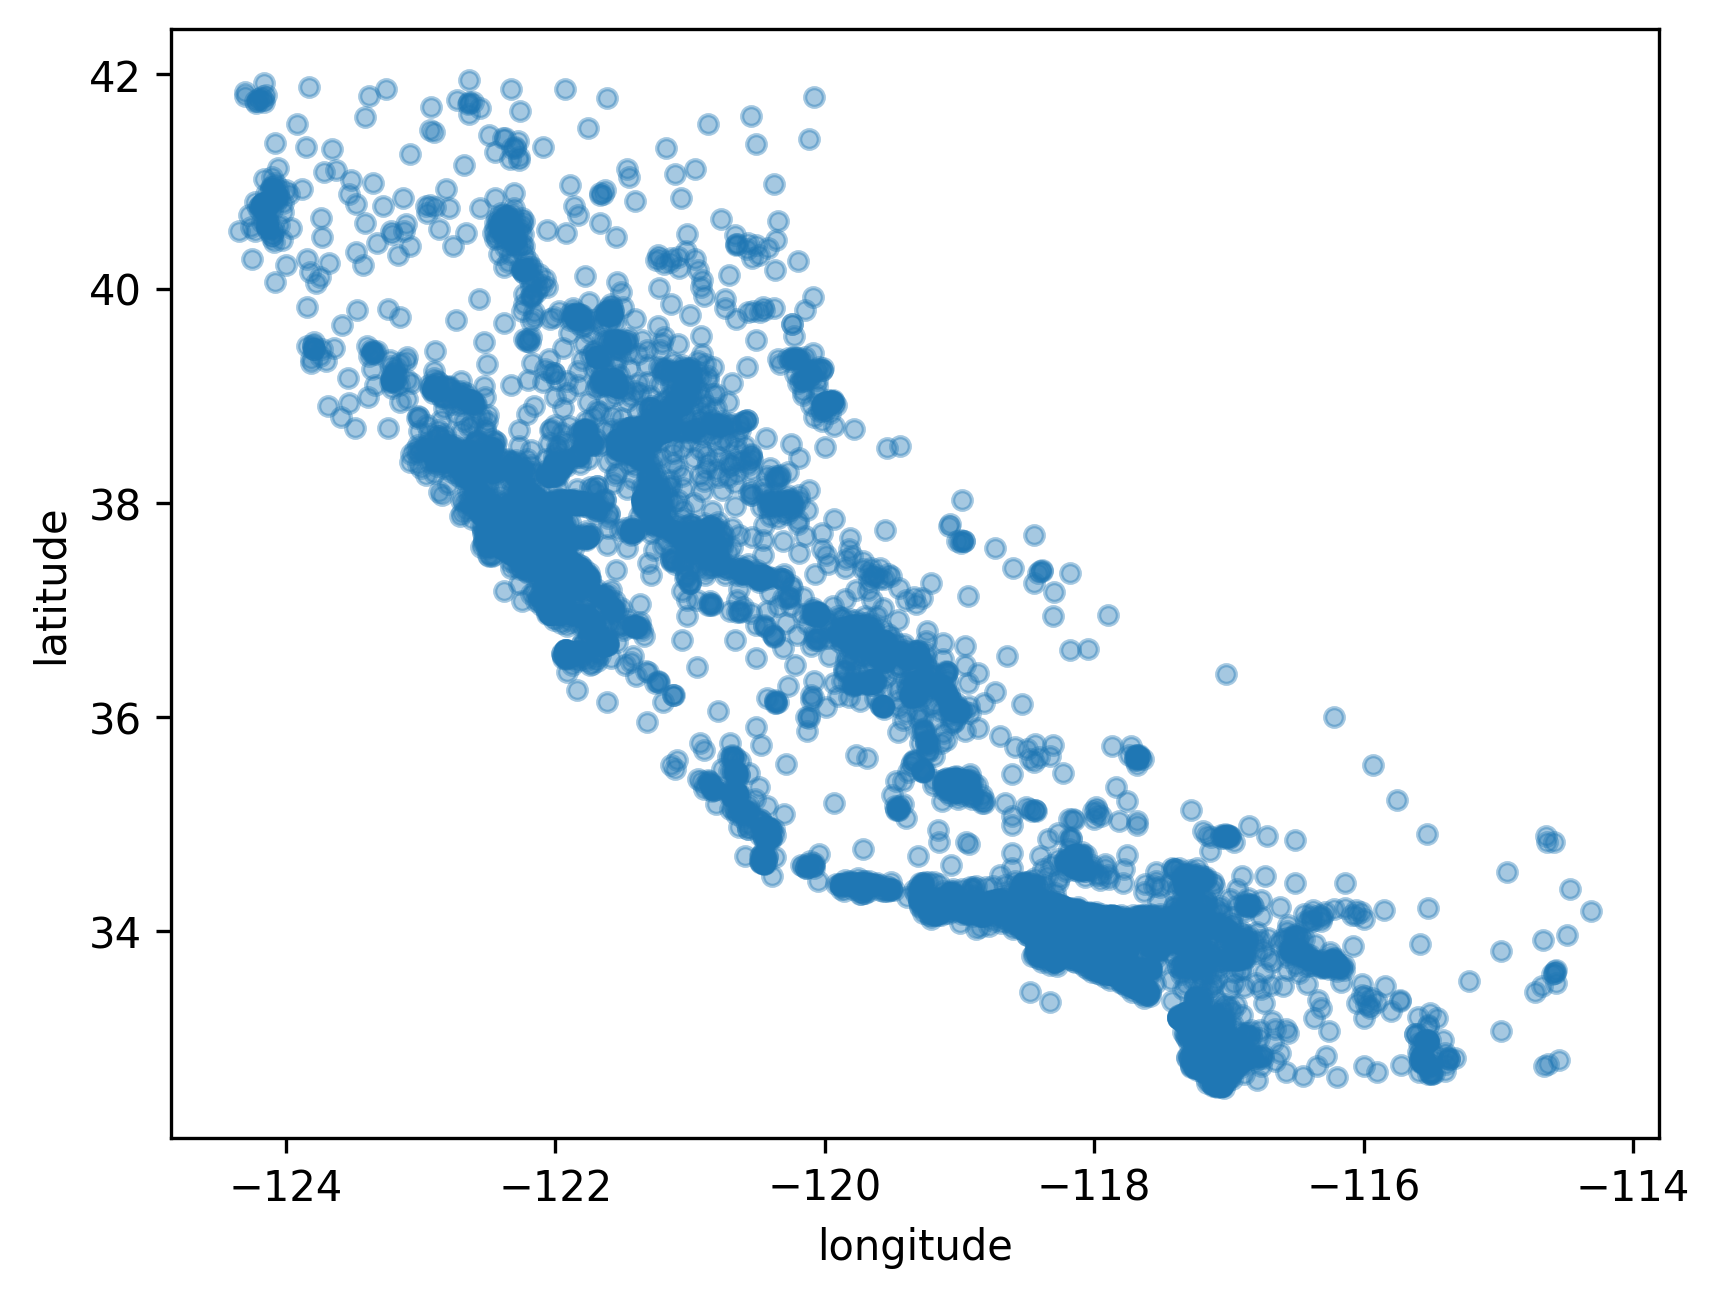

In [27]:
plt.rcParams['figure.dpi'] = 300
housing.plot(x="longitude", y="latitude", kind="scatter", alpha=0.4)

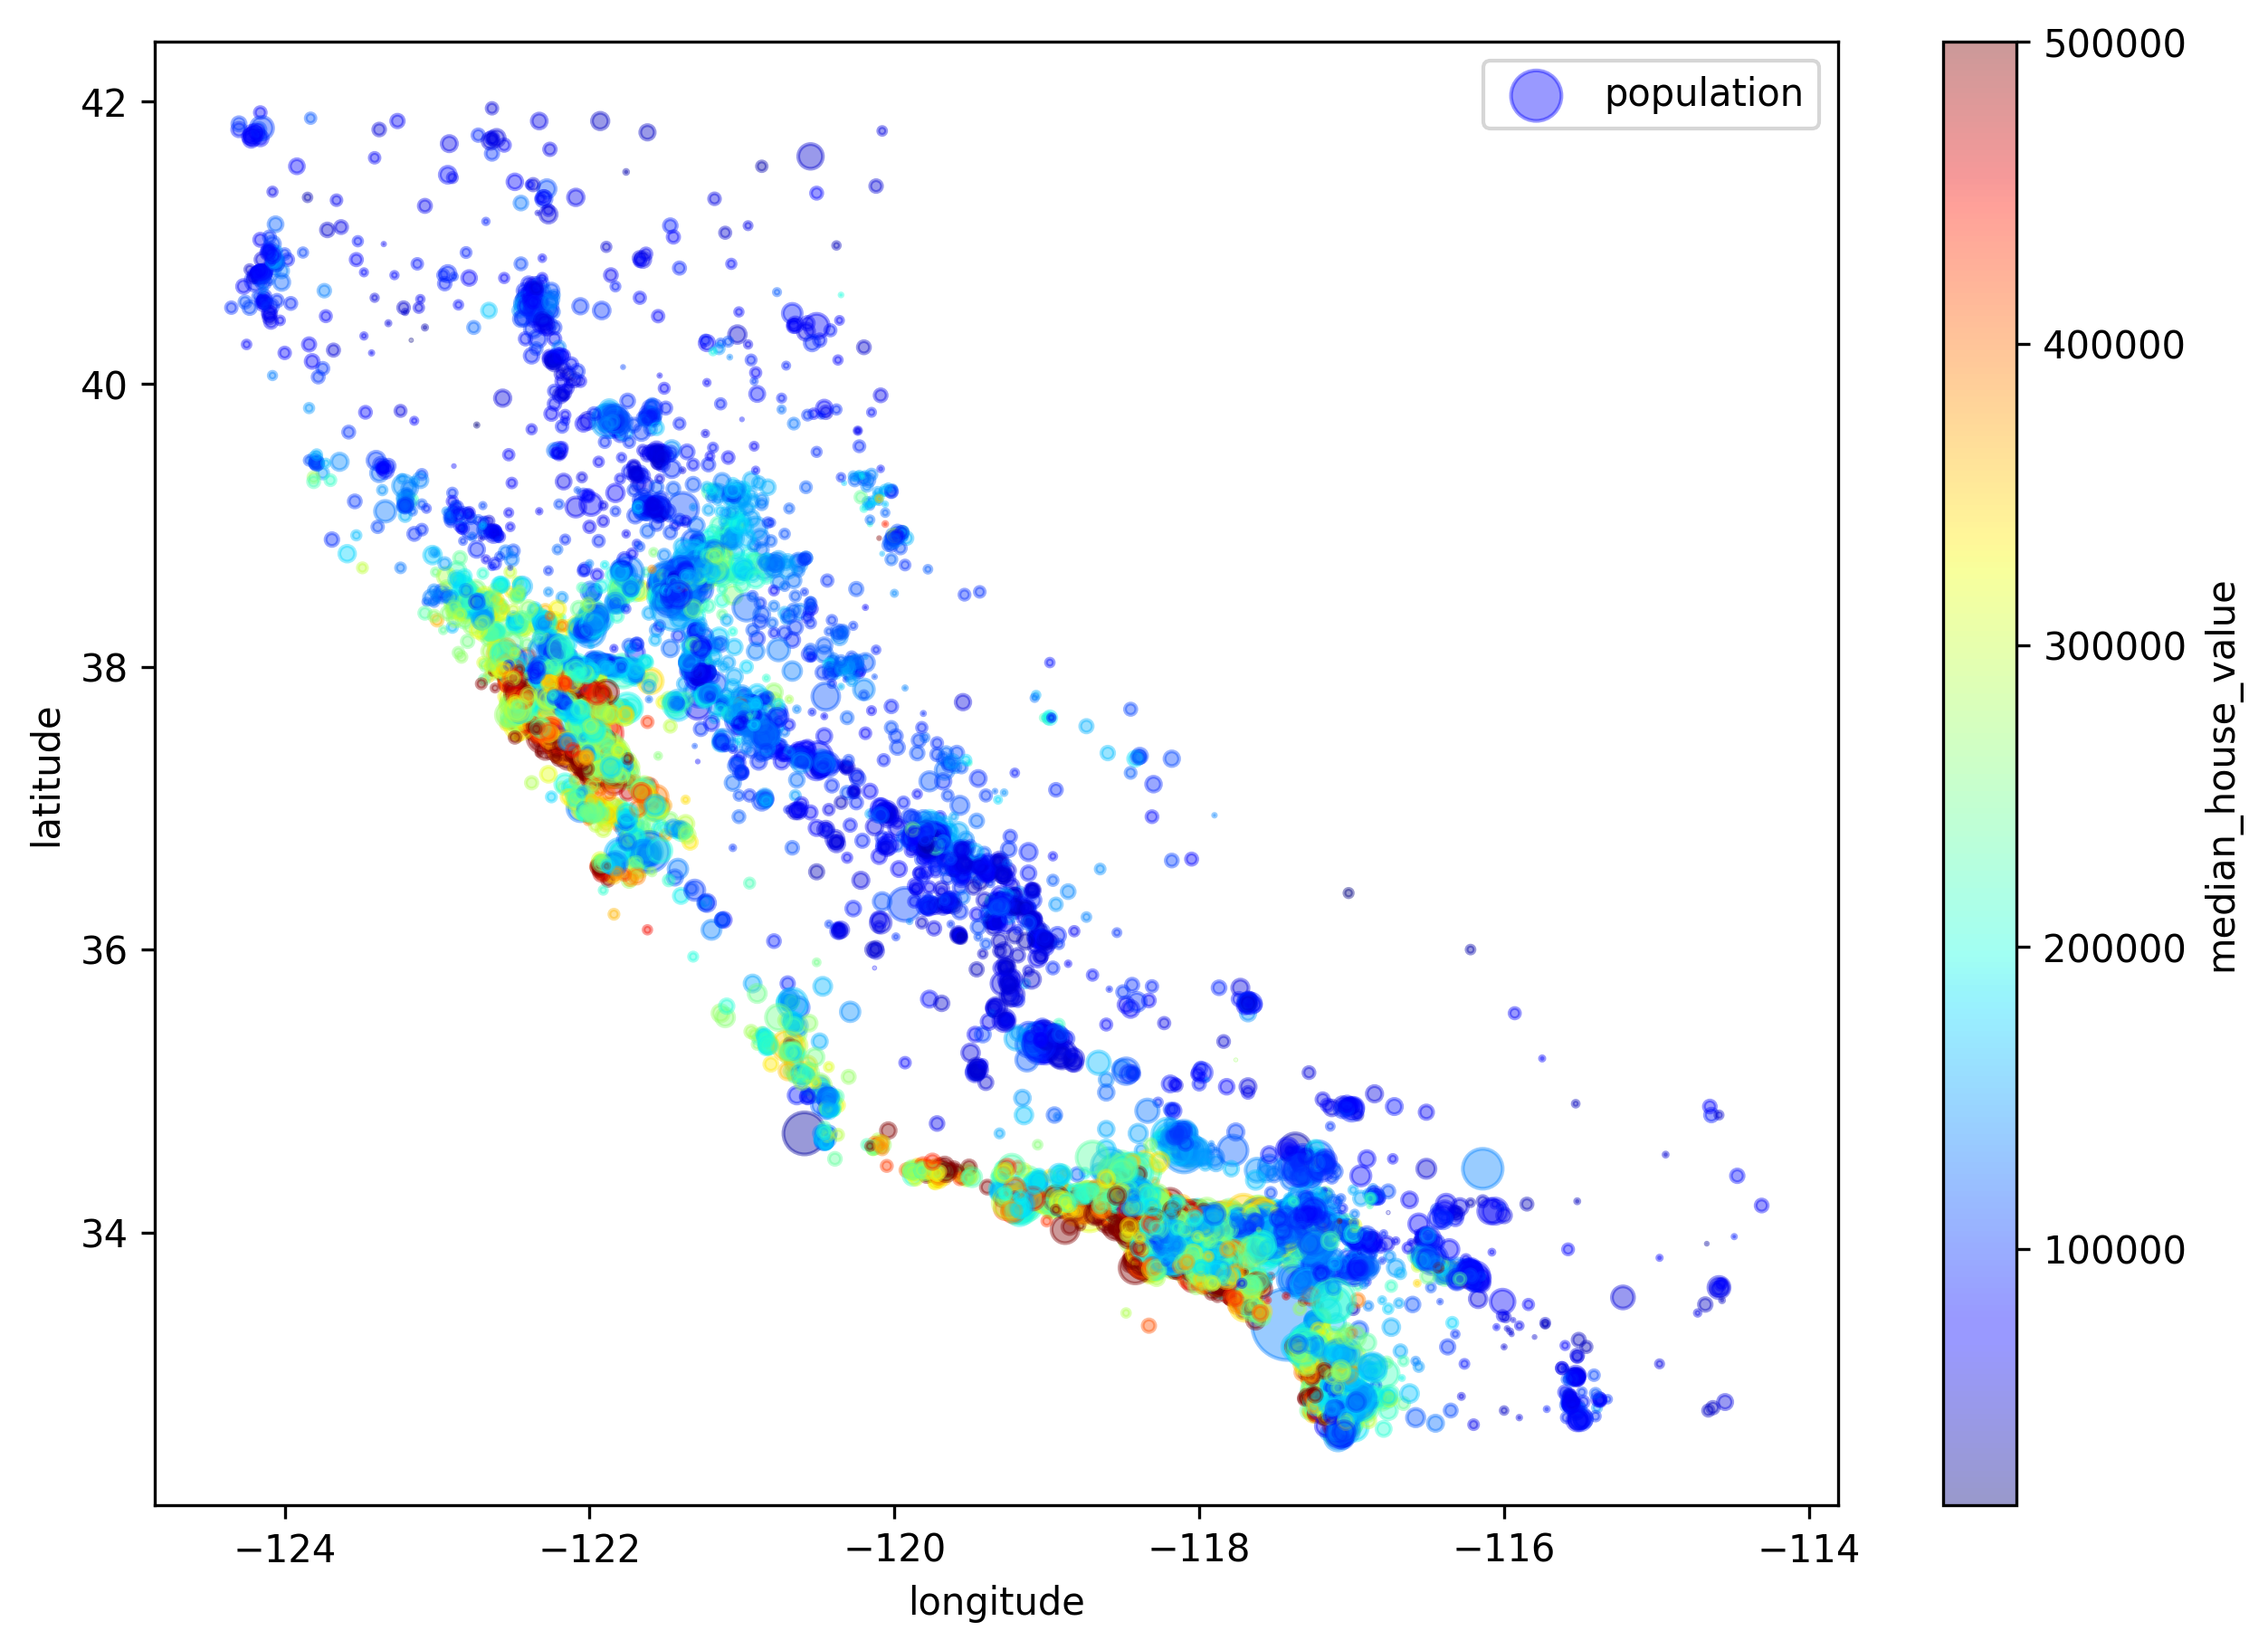

In [28]:
#housing.plot(x="longitude", y="latitude", kind="scatter", alpha=0.4, label="density", c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),)
housing.plot(x="longitude", y="latitude", kind="scatter", alpha=0.4, label="population", s=housing["population"]/100, c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True, figsize=(10,7),)
plt.legend()

red is expensive, blue is cheap, larger circles indicate areas with larger population

## Looking for Correlations

_since_ dataset is not too large => can compute ___standard correlation cofficient___ (_peason's r_) between every pair of attr


In [29]:
corr_matrix = housing.corr(numeric_only=True)

In [30]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687151
total_rooms           0.135140
housing_median_age    0.114146
households            0.064590
total_bedrooms        0.047781
population           -0.026882
longitude            -0.047466
latitude             -0.142673
Name: median_house_value, dtype: float64

In [31]:
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

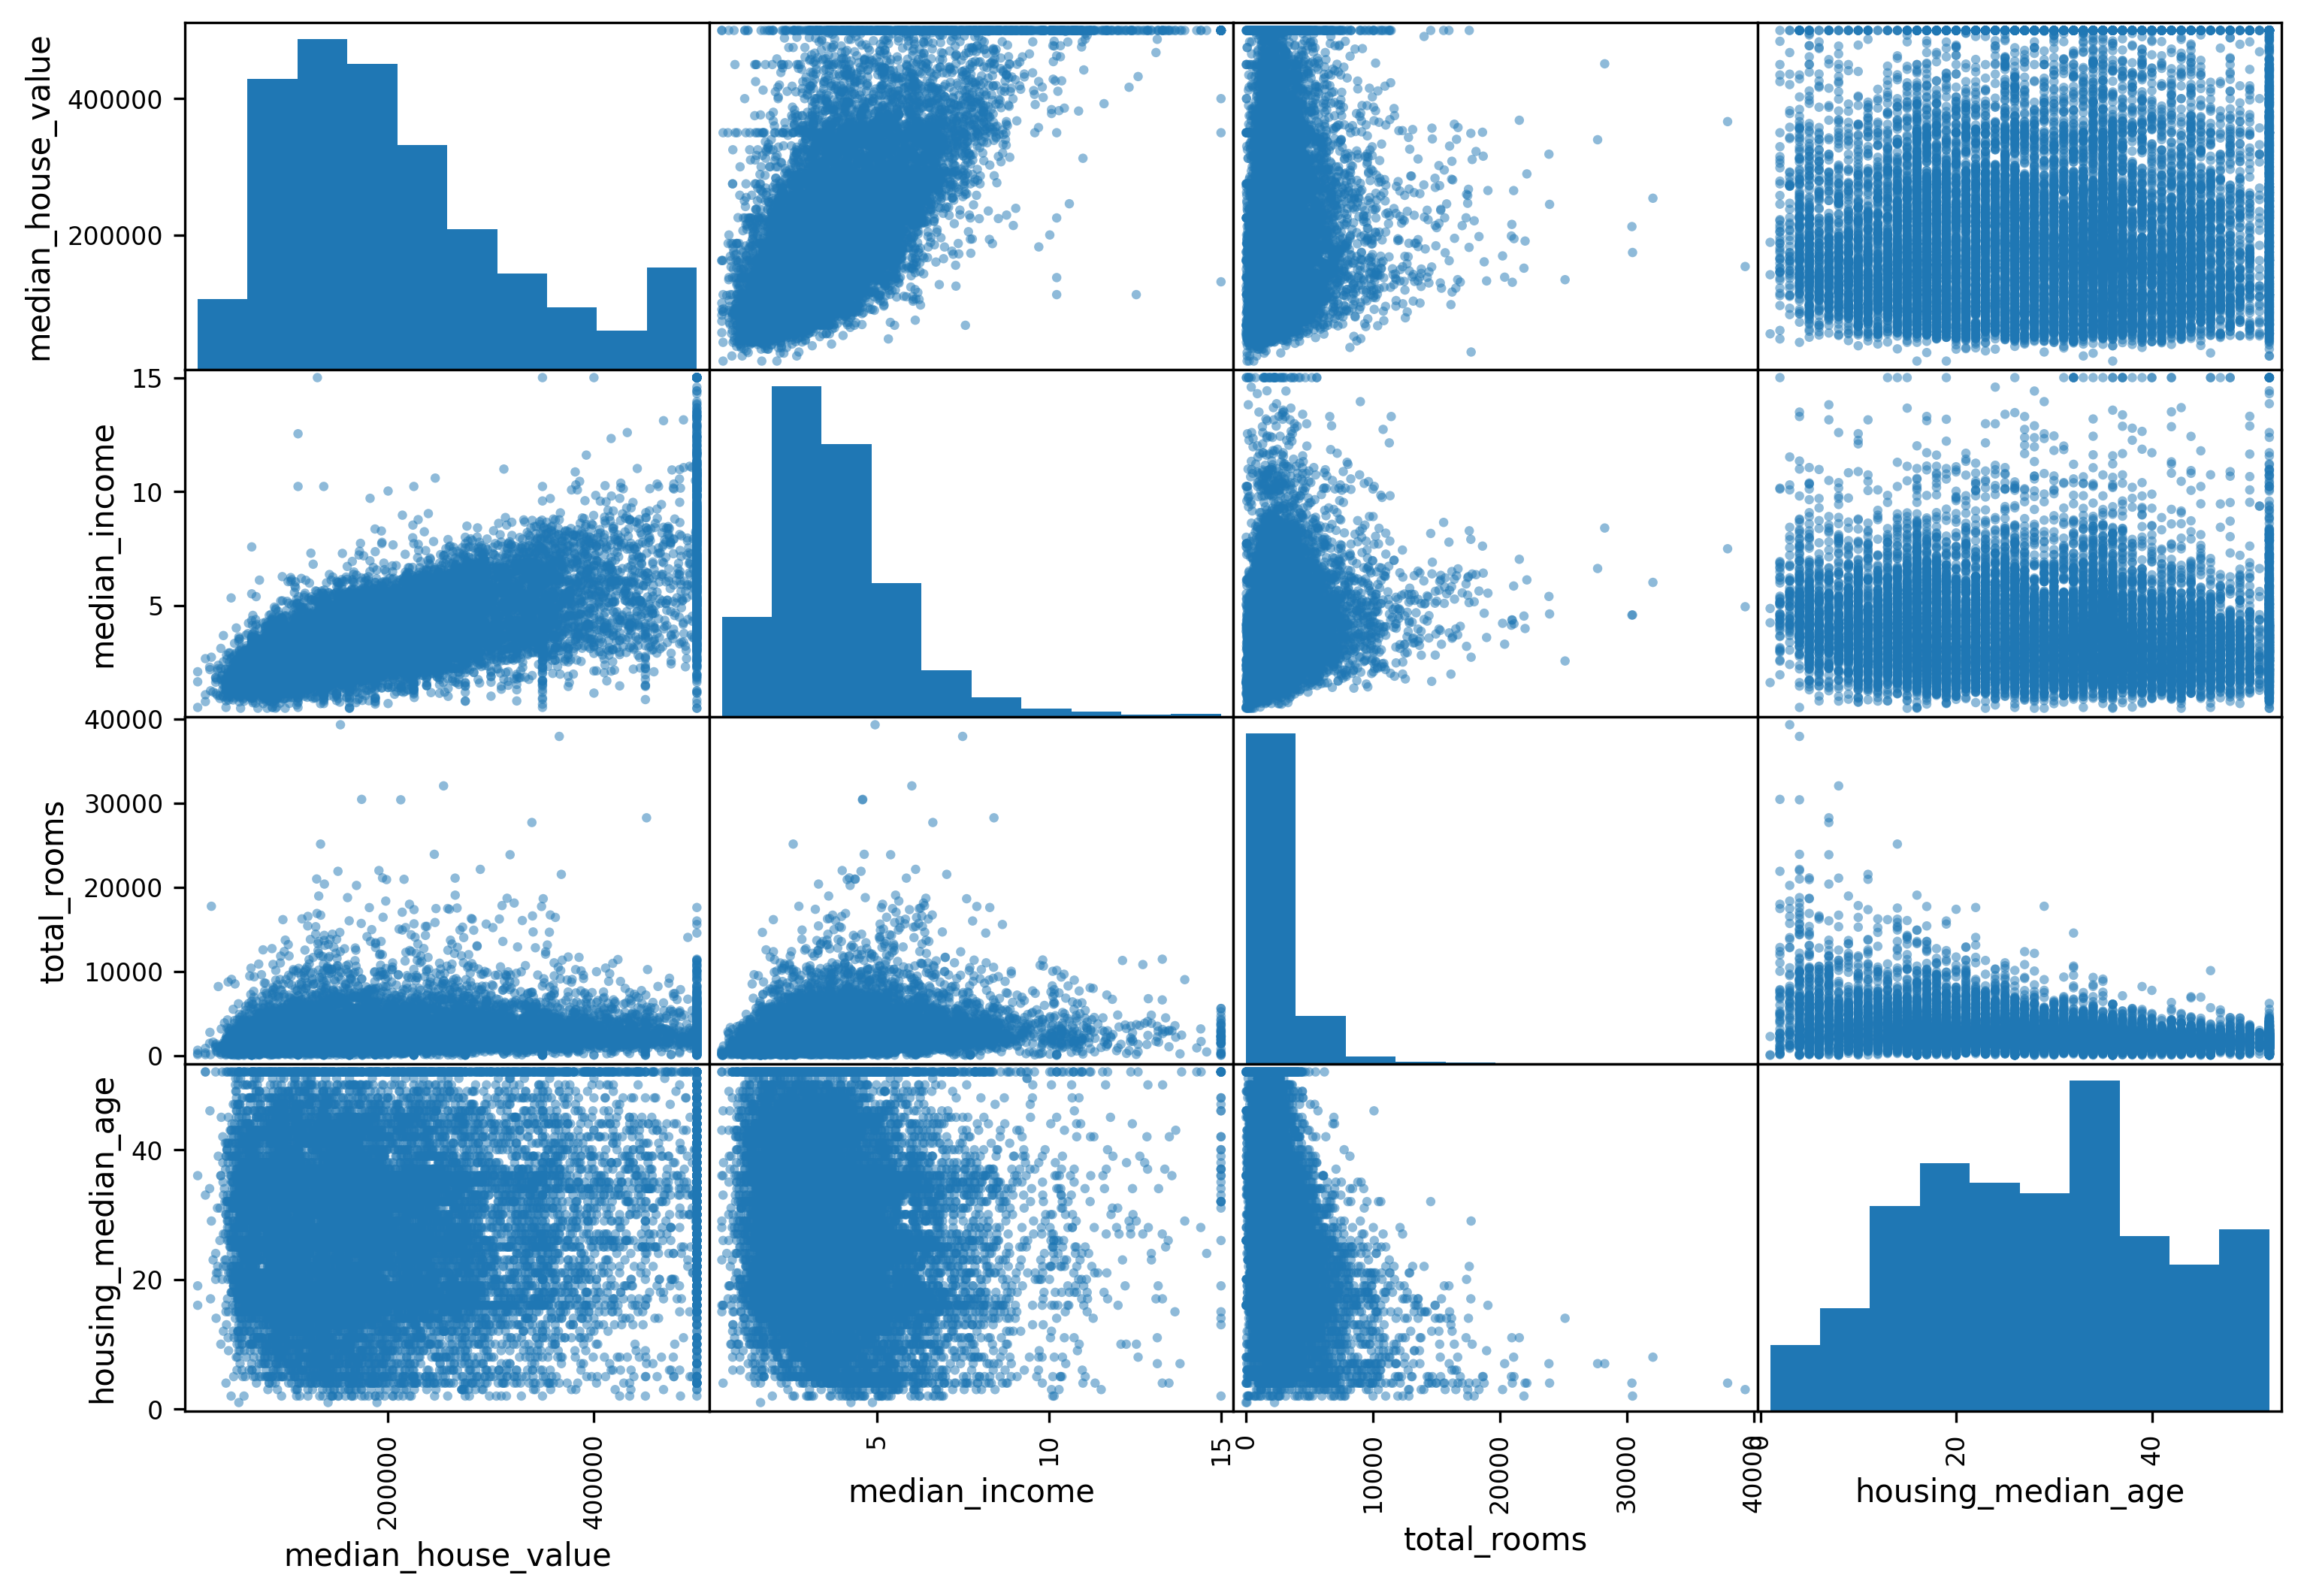

In [32]:
from pandas.plotting import scatter_matrix
scatter_matrix(housing[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

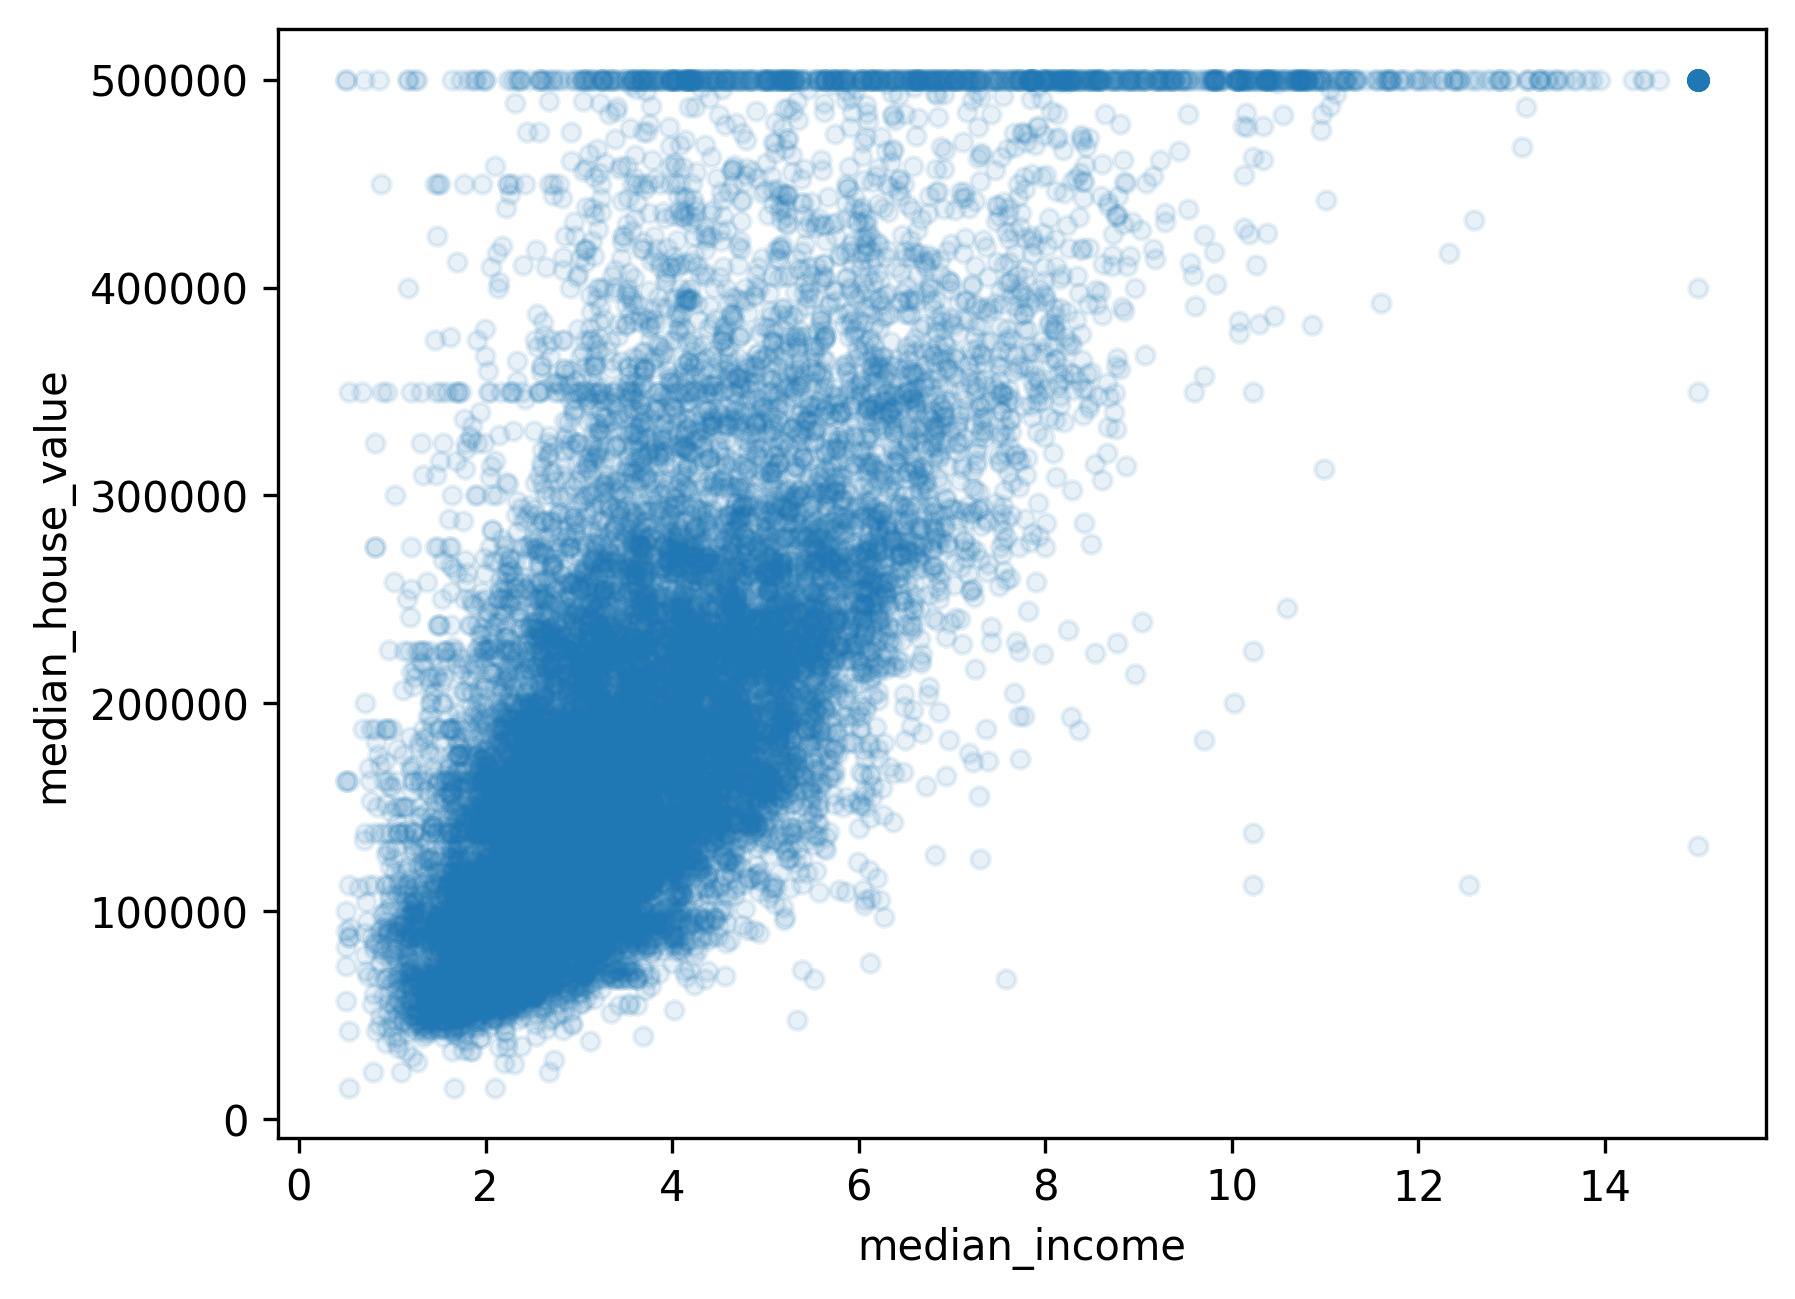

In [33]:
housing.plot(x="median_income", y="median_house_value",  kind="scatter", alpha=0.1)

**Notes:**
1. median income strong correlated with median house value (upward trend)
2. you can see hourizantal lines due to capped median house value
3. there's also some horizantal lines "less obviouse" around 450k, 350k, also probably one around 280k => can remove them so model don't learn this quirks 

## Experimenting with Attribute Combinations

In [34]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [35]:
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_rooms'] =  housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

In [36]:
corr_matrix = housing.corr(numeric_only=True)

In [37]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687151
rooms_per_household         0.146255
total_rooms                 0.135140
housing_median_age          0.114146
households                  0.064590
total_bedrooms              0.047781
population_per_household   -0.021991
population                 -0.026882
longitude                  -0.047466
latitude                   -0.142673
bedrooms_per_rooms         -0.259952
Name: median_house_value, dtype: float64

# Prepare the Data for Machine Learning Algorithms


In [38]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

## Data Cleaning

### handle missing values
most ML algorithms cannot work with missing features \
__solutions:__
1. Git rid of samples => that have missing values
2. Git rid of attribute
3. Set the values to some values (zero - mean - median - etc...)
\
\
here in dataset the _total bedrooms_ have some missing values

In [39]:
#option 1
housing.dropna(subset=["total_bedrooms"])

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12655    -121.46     38.52                29.0       3873.0           797.0   
15502    -117.23     33.09                 7.0       5320.0           855.0   
2908     -119.04     35.37                44.0       1618.0           310.0   
14053    -117.13     32.75                24.0       1877.0           519.0   
20496    -118.70     34.28                27.0       3536.0           646.0   
...          ...       ...                 ...          ...             ...   
15174    -117.07     33.03                14.0       6665.0          1231.0   
12661    -121.42     38.51                15.0       7901.0          1422.0   
19263    -122.72     38.44                48.0        707.0           166.0   
19140    -122.70     38.31                14.0       3155.0           580.0   
19773    -122.14     39.97                27.0       1079.0           222.0   

       population  households  median_income ocean_proximity  
12655      2237.0       706.0         2.1736          INLAND  
15502      2015.0       768.0         6.3373      NEAR OCEAN  
2908        667.0       300.0         2.8750          INLAND  
14053       898.0       483.0         2.2264      NEAR OCEAN  
20496      1837.0       580.0         4.4964       <1H OCEAN  
...           ...         ...            ...             ...  
15174      2026.0      1001.0         5.0900       <1H OCEAN  
12661      4769.0      1418.0         2.8139          INLAND  
19263       458.0       172.0         3.1797       <1H OCEAN  
19140      1208.0       501.0         4.1964       <1H OCEAN  
19773       625.0       197.0         3.1319          INLAND  

[16354 rows x 9 columns]

In [40]:
#option 2
housing.drop("total_bedrooms", axis=1)

longitude  latitude  housing_median_age  total_rooms  population  \
12655    -121.46     38.52                29.0       3873.0      2237.0   
15502    -117.23     33.09                 7.0       5320.0      2015.0   
2908     -119.04     35.37                44.0       1618.0       667.0   
14053    -117.13     32.75                24.0       1877.0       898.0   
20496    -118.70     34.28                27.0       3536.0      1837.0   
...          ...       ...                 ...          ...         ...   
15174    -117.07     33.03                14.0       6665.0      2026.0   
12661    -121.42     38.51                15.0       7901.0      4769.0   
19263    -122.72     38.44                48.0        707.0       458.0   
19140    -122.70     38.31                14.0       3155.0      1208.0   
19773    -122.14     39.97                27.0       1079.0       625.0   

       households  median_income ocean_proximity  
12655       706.0         2.1736          INLAND  
15502       768.0         6.3373      NEAR OCEAN  
2908        300.0         2.8750          INLAND  
14053       483.0         2.2264      NEAR OCEAN  
20496       580.0         4.4964       <1H OCEAN  
...           ...            ...             ...  
15174      1001.0         5.0900       <1H OCEAN  
12661      1418.0         2.8139          INLAND  
19263       172.0         3.1797       <1H OCEAN  
19140       501.0         4.1964       <1H OCEAN  
19773       197.0         3.1319          INLAND  

[16512 rows x 8 columns]

In [41]:
#option 3
median = housing['total_bedrooms'].median()
housing['total_bedrooms'].fillna(median)

12655     797.0
15502     855.0
2908      310.0
14053     519.0
20496     646.0
          ...  
15174    1231.0
12661    1422.0
19263     166.0
19140     580.0
19773     222.0
Name: total_bedrooms, Length: 16512, dtype: float64

**NOTE:** if we choose _(option 3)_ we need to store **value that we used to fill NULLs need => to use it to fill in _test set & production_** 

Scikit Do it better

In [42]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy="median")
#since we can use it on only on numerical features 
housing_num = housing.drop("ocean_proximity", axis=1)
#fit imputer
imputer.fit(housing_num)
#imputer store statistics
print(imputer.statistics_)
print(np.array(housing_num.median()))

[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]
[-118.51      34.26      29.      2119.       433.      1164.
  408.         3.54155]


In [44]:
# we can use this trained imputer to transform training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

## Handling Text and Categorical Attributes


In [45]:
# take look on categorical attributes
housing_cat = housing[["ocean_proximity"]]

housing_cat.head()

ocean_proximity
12655          INLAND
15502      NEAR OCEAN
2908           INLAND
14053      NEAR OCEAN
20496       <1H OCEAN

* this is categorical attribute Not text
* since most of ML algorithms prefer to work with numerical attributes
* so lets convert it

In [46]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:10]

array([[1.],
       [4.],
       [1.],
       [4.],
       [0.],
       [3.],
       [0.],
       [0.],
       [0.],
       [0.]])

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

**Problem:** the ML algorithm will _assume_ that two nearby value will be more similar \
**Like:** '<1H OCEAN' are more similar to '<1H OCEAN' => than => 'NEAR OCEAN' \
\
\
**Solution:** ***Hot encoding*** => will create attributes that will set One with 1 and other of zero with different values

In [48]:
from sklearn.preprocessing import OneHotEncoder

In [49]:
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

**sparse matrix** is efficent where matrixs filled by zeros \
which is useful for catergorical attributs of many of zeros and One 1 for each sample \
\
but you can see it as dense numpy array

In [50]:
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

**TIP:**
* if categorical attributes have ***so many possible categroies*** => you can replace with relative numerical attribute 
    > eg: instead of ___ocean_proximity___ with ___distance_from_ocean___
* other solution: you can replace it with ___learnable___ low dimension vector => called __embedding__ which be learned during training
    *  this example on repersentation learning

## Custom Transform
>even if scikit provide many useful transforms \
>you will need to __write your own__ for tasks like (cleanup, combinig specific attribute) \
>you will want to use __Transformers__ to work seamlessly with some scikit functionalities like (_pipelines_)

**NOTE:** Scikit relies on ___duck typing___ not ___inheritance___ 
> Duck typing: we don't care about type or class of object we only care about the method that can actually do

**TODO it:**
1. create class that implement 3 methods (```fit()```, ```transform()```, ```fit_transform()```)
2. you can get ```fit_transform()``` for free by inherit ```TransformerMixin```
3. if you add ```BaseEstimator``` as base class
    *  avoid *args, **kargs in _constructor_
    *  you will get two extra methods ```get_params()``` and ```set_params()```
    *  which are useful for automatic hyperparameter tuning ???

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin
# store index of columns of some attributes
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

In [54]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True): #### no *args, **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self # nothing else todo
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

In [55]:
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

**NOTE:** ```add_bedrooms_per_room``` is _hyperparameter_ which will allow to easily find out whether this attrib help or not \
you can gate any hyperparameters that you are 100% not sure about \
>***the more you can automate, the more combinations you can automatically try out, making it much more likely that you find great combination***

## Feature Scaling

#### ML Algorithms Common Problem

most ml algorithms don't perform well => when input of numberical attribute have different scales \
eg: total rooms (6__39,320) while, median income (0 __ 15) \
**NOTE:** scaling target is generally NOT required \
\
\
there's 2 ways to make all attributes have same scale:
1. min-max scaling (normalization)
2. standardization (z-transform)

#### Min-Max scaling (Normalization)

* is the simplesist solution
* making range from [0, 1]
* formula:
    $$
        x_i = \frac{(x_i - min)}{max} 
    $$
* scikit provide transformer to do it ```MinMaxScalar``` with ```feature_range``` hyperparameter in case you don

#### Standardization scaling

* kind like z-transform
* More robust to outliers
* there's infinte range values => which **may cause problem** to some algorthims (eg: NN excpect an input values ranging [0,1]  
* formula:
    $$
        x_i = \frac{(x_i - \mu)}{\sigma} 
    $$
* scikit provide transformer to do it ```StandardScalar```

#### Warning
with all transformation, it's __important__ to fit the scalers ___only on training data___ not to fully dataset \
Only then can use them to transform the training & test set 

## Transformation Pipeline
scikit provide pipeline class to help with sequence of transformations

In [58]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [59]:
# simple pipeline for numerical attributes
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [60]:
housing_num_tr = num_pipeline.fit_transform(housing_num)

**Conditions on Pipeline:**
1. names => unique & don't have double underscore (__)
2. All but last classes must be ``Transformers`` having ``fit_transform()`` 
3. when you call ``fit()`` on pipeline it call ``fit_transform()`` on all transformers passing output to next till reach last one called ***same method***

**Get bored from handling numerical different from categroical**
scikit solve that by introducing ``ColumnTransformer`` which enable to combine multiple transform for proper attributes

In [73]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num.columns)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs),
], remainder="passthrough") #remainder handle other columns => [default="drop", "passthrough"]

In [74]:
housing_prepared = full_pipeline.fit_transform(housing) # remember housing is training set from starta without labels

In [75]:
housing_prepared[:5]

array([[-0.94135046,  1.34743822,  0.02756357,  0.58477745,  0.64037127,
         0.73260236,  0.55628602, -0.8936472 ,  0.01739526,  0.00622264,
        -0.12112176,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.17178212, -1.19243966, -1.72201763,  1.26146668,  0.78156132,
         0.53361152,  0.72131799,  1.292168  ,  0.56925554, -0.04081077,
        -0.81086696,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.26758118, -0.1259716 ,  1.22045984, -0.46977281, -0.54513828,
        -0.67467519, -0.52440722, -0.52543365, -0.01802432, -0.07537122,
        -0.33827252,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [ 1.22173797, -1.35147437, -0.37006852, -0.34865152, -0.03636724,
        -0.46761716, -0.03729672, -0.86592882, -0.59513997, -0.10680295,
         0.96120521,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       [ 0.43743108, -0.63581817, -0

**NOTE:**
the ``OneHotEncoder`` return scipy sparse matrix \
when ``ColumnTransformer`` see different types return (Numpy & sparse matrix) \
it handle it by: measure #zeros in whole matrix and if the (_ratio of non-zeros cells_ < _``sparse_threshold=0.3``_) it return sparse matrix else return Numpy